In [3]:
import sys
sys.path.append('/cluster/sj1/bb_opt/scripts')

In [4]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collect_stats as cs

%matplotlib inline

In [5]:
import collect_stats as cs

In [6]:
exp_folder = '/cluster/sj1/bb_opt/experiments/imdbwiki'
batches = [20, 50, 200]
num_acks = 50

In [7]:
filenames = ['wiki']

In [8]:
def sigmoid(x, exp=np.exp):
  return 1.0 / (1.0 + exp(-x))

In [9]:
arrs = {}

In [47]:
to_read = {
    #'ensemble1/o_max_std_dataseed_modelseed_': [None, 'e1_maxstd'],
    #'ensemble1/o_uniform_dataseed_modelseed_': [None, 'e1_uniform'],
    #'ensemble1/o_max_std_maxvar_g000510204080_dataseed_modelseed_': [None, 'e1_maxvar_g80'],
    #'ensemble2/o_max_std_dataseed_modelseed_': [None, 'e2'],
    #'ensemble2/o_uniform_dataseed_modelseed_': [None, 'e2_uniform'],
    #'ensemble2/o_max_std_maxinvar_g002040_dataseed_modelseed_': [None, 'e2_invar_g80'],
    #'ensemble3/o_max_std_dataseed_modelseed_': [None, 'e3'],
    #'ensemble3/o_max_std_maxvar_g001020_dataseed_modelseed_': [None, 'e3_maxvar_g20'],
    #'ensemble3/o_max_std_maxvar_g20_dataseed_modelseed_': [None, 'e3_maxvar_g20_only'],
    #'ensemble3/o_max_std_maxvar_indist_g001020_dataseed_modelseed_': [None, 'e3_maxvar_indist_g20'],
    #'ensemble3/o_max_std_maxvar_indist_g00102030_dataseed_modelseed_': [None, 'e3_maxvar_indist_g30'], 
    #'ensemble4/o_max_std_maxvar_indist_g00102030_dataseed_modelseed_': [None, 'e4_maxvar_indist_g40'],
    #'ensemble4/o_max_std_dataseed_modelseed_': [None, 'e4'],
    #'ensemble5/o_max_std_2k_': [None, 'e5_2k'],
    #'ensemble5/o_max_std_2k_maxvar_g010205_': [None, 'e5_ratio_2k_g010205'],
    #'ensemble14/o_max_std_3k_': [None, 'DeepEns'],
    #'ensemble14/o_uniform_2k_': [None, 'uniform_ack_DeepEns'],
    #'ensemble14/o_max_std_maxvar_g0002051020_2k_': [None, 'MOD'],
    #'ensemble14/o_max_std_maxvar_unseen_ind_g0002051020_2k_': [None, 'MOD_unseen'],
    #'ensemble14/o_max_std_maxvar_unseen_ind_g0005102030_2k_': [None, 'MOD_unseen_g30'],
    #'ensemble14/o_max_std_maxvar_unseen_ind_g051020_3k_': [None, 'MOD_unseen_g20'],
    #'ensemble14/o_max_std_maxvar_unseen_ind_inverse_density_g051020_3k_': [None, 'MOD_unseen_inverse'],
    #'ensemble14/o_max_var_ratio_3k_': [None, 'DeepEns_var_ratio_3k'],
    #'ensemble14/o_max_var_ratio_maxvar_unseen_ind_g051020_3k_': [None, 'MOD_var_ratio_g20_3k'],
    #'ensemble15/o_max_std_3k_': [None, 'DeepEns'],
    #'ensemble15/o_max_std_nhidden_10_3k_': [None, 'DeepEns_nh10'],
    #'ensemble15/o_uniform_3k_init_init_': [None, 'DeepEns_uniform'],
    #'ensemble15/o_max_std_3k_init_init_': [None, 'DeepEns'],
    #'ensemble15/o_max_std_30_iter_3k_init_init_': [None, 'DeepEns30'],
    'ensemble15/o_max_std_40_iter_3k_init_init_': [None, 'DeepEns40'],
    
    #'ensemble15/o_max_std_maxvar_g0002051020_3k_init_init_': [None, 'MOD_unseen'],
    #'ensemble15/o_max_std_maxvar_g0002051020_ss_input_sd_uniform_3k_init_init_': [None, 'MOD'],
    #'ensemble15/o_uniform_2k_': [None, 'DeepEns_fixed_iter'],
    #'ensemble15/o_max_std_maxvar_unseen_ind_g051020_2k_': [None, 'MOD_unseen_g20_3k'],
    #'ensemble15/o_max_std_R_maxvar_g001020_3k_init_init_': [None, 'MODR_unseen'],
    #'ensemble15/o_max_std_R_embspace_maxvar_g001020_3k_init_init_': [None, 'MODR_unseen_emb'],
    #'ensemble15/o_max_std_unseen_ind_10_iter_maxvar_g000205_3k_init_init_': [None, '10_iter_g025'],
    #'ensemble15/o_max_std_unseen_ind_10_iter_maxvar_g010205_3k_init_init_': [None, '10_iter_g125'],
    #'ensemble15/o_max_std_unseen_ind_10_iter_maxvar_g011020_3k_init_init_': [None, '10_iter_g11020'],
    #'ensemble15/o_max_std_unseen_ind_10_iter_R_maxvar_g000205_3k_init_init_': [None, 'R_10_iter_g025'],
    #'ensemble15/o_max_std_unseen_ind_10_iter_R_maxvar_g010205_3k_init_init_': [None, 'R_10_iter_g125'],
    #'ensemble15/o_max_std_unseen_ind_10_iter_R_maxvar_g011020_3k_init_init_': [None, 'R_10_iter_g11020'],
    #'ensemble15/o_max_std_unseen_ind_20_iter_maxvar_g000205_3k_init_init_': [None, '20_iter_g025'],
    #'ensemble15/o_max_std_unseen_ind_20_iter_maxvar_g010205_3k_init_init_': [None, '20_iter_g125'],
    #'ensemble15/o_max_std_unseen_ind_20_iter_maxvar_g011020_3k_init_init_': [None, '20_iter_g11020'],
    #'ensemble15/o_max_std_unseen_ind_20_iter_R_maxvar_g000205_3k_init_init_': [None, 'R_20_iter_g025'],
    #'ensemble15/o_max_std_unseen_ind_20_iter_R_maxvar_g010205_3k_init_init_': [None, 'R_20_iter_g125'],
    #'ensemble15/o_max_std_unseen_ind_20_iter_R_maxvar_g011020_3k_init_init_': [None, 'R_20_iter_g11020'],
    #'ensemble15/o_max_std_unseen_ind_30_iter_R_maxvar_g000205_3k_init_init_': [None, 'R_30_iter_g025'],
    #'ensemble15/o_max_std_unseen_ind_30_iter_Remb_maxvar_g000205_3k_init_init_': [None, 'Remb_30_iter_g025'],
    'ensemble15/o_max_std_input_40_iter_maxvar_g000205_3k_init_init_': [None, '40_iter_g025'],
    'ensemble15/o_max_std_input_40_iter_R_maxvar_g000205_3k_init_init_': [None, 'R_40_iter_g025'],
    'ensemble15/o_max_std_input_40_iter_Remb_maxvar_g000205_3k_init_init_': [None, 'Remb_40_iter_g025'],
}


In [48]:
for k in to_read:
    arrs[k] = to_read[k]
for experiment in to_read:
    print('reading', experiment)
    arrs[experiment][0] = cs.get_data(exp_folder, experiment, batches, num_samples=3)

reading ensemble15/o_max_std_40_iter_3k_init_init_
reading sample 1
reading sample 2
reading sample 3
reading ensemble15/o_max_std_input_40_iter_maxvar_g000205_3k_init_init_
reading sample 1
reading sample 2
reading sample 3
reading ensemble15/o_max_std_input_40_iter_R_maxvar_g000205_3k_init_init_
reading sample 1
reading sample 2
reading sample 3
reading ensemble15/o_max_std_input_40_iter_Remb_maxvar_g000205_3k_init_init_
reading sample 1
reading sample 2
reading sample 3


In [57]:
to_eval = [
    #'ensemble1/o_max_std_dataseed_modelseed_',
    #'ensemble1/o_uniform_dataseed_modelseed_',
    #'ensemble1/o_max_std_maxvar_g000510204080_dataseed_modelseed_',
    #'ensemble2/o_max_std_dataseed_modelseed_',
    #'ensemble2/o_uniform_dataseed_modelseed_',
    #'ensemble2/o_max_std_maxinvar_g002040_dataseed_modelseed_'
    #'ensemble3/o_max_std_dataseed_modelseed_',
    #'ensemble3/o_max_std_maxvar_g001020_dataseed_modelseed_',
    #'ensemble3/o_max_std_maxvar_indist_g001020_dataseed_modelseed_',
    #'ensemble3/o_max_std_maxvar_indist_g00102030_dataseed_modelseed_',
    #'ensemble3/o_max_std_maxvar_g20_dataseed_modelseed_',
    #'ensemble4/o_max_std_maxvar_indist_g00102030_dataseed_modelseed_',
    #'ensemble4/o_max_std_dataseed_modelseed_',
    #'ensemble5/o_max_std_2k_',
    #'ensemble5/o_max_std_2k_maxvar_g010205_',
    #'ensemble14/o_max_std_3k_',
    #'ensemble14/o_uniform_2k_',
    #'ensemble14/o_max_std_maxvar_g0002051020_2k_',
    #'ensemble14/o_max_std_maxvar_unseen_ind_g0002051020_2k_',
    #'ensemble14/o_max_std_maxvar_unseen_ind_inverse_density_g051020_3k_',
    #'ensemble14/o_max_std_maxvar_unseen_ind_g0005102030_2k_',
    #'ensemble14/o_max_std_maxvar_unseen_ind_g051020_3k_',
    #'ensemble14/o_max_var_ratio_3k_',
    #'ensemble14/o_max_var_ratio_maxvar_unseen_ind_g051020_3k_',
    #'ensemble15/o_uniform_2k_',
    #'ensemble15/o_max_std_3k_',
    #'ensemble15/o_uniform_3k_init_init_',
    #'ensemble15/o_max_std_3k_init_init_',
    #'ensemble15/o_max_std_30_iter_3k_init_init_',
    'ensemble15/o_max_std_40_iter_3k_init_init_',
    
    #'ensemble15/o_max_std_maxvar_g0002051020_3k_init_init_',
    #'ensemble15/o_max_std_maxvar_g0002051020_ss_input_sd_uniform_3k_init_init_',
    #'ensemble15/o_max_std_nhidden_10_3k_',
    #'ensemble15/o_max_std_maxvar_unseen_ind_g051020_2k_',
    #'ensemble15/o_max_std_R_maxvar_g001020_3k_init_init_',
    #'ensemble15/o_max_std_R_embspace_maxvar_g001020_3k_init_init_',
    #'ensemble15/o_max_std_unseen_ind_10_iter_maxvar_g000205_3k_init_init_',
    #'ensemble15/o_max_std_unseen_ind_10_iter_maxvar_g010205_3k_init_init_',
    #'ensemble15/o_max_std_unseen_ind_10_iter_maxvar_g011020_3k_init_init_',
    #'ensemble15/o_max_std_unseen_ind_10_iter_R_maxvar_g000205_3k_init_init_',
    #'ensemble15/o_max_std_unseen_ind_10_iter_R_maxvar_g010205_3k_init_init_',
    #'ensemble15/o_max_std_unseen_ind_10_iter_R_maxvar_g011020_3k_init_init_',
    #'ensemble15/o_max_std_unseen_ind_20_iter_maxvar_g000205_3k_init_init_',
    #'ensemble15/o_max_std_unseen_ind_20_iter_maxvar_g010205_3k_init_init_',
    #'ensemble15/o_max_std_unseen_ind_20_iter_maxvar_g011020_3k_init_init_',
    #'ensemble15/o_max_std_unseen_ind_20_iter_R_maxvar_g000205_3k_init_init_',
    #'ensemble15/o_max_std_unseen_ind_20_iter_R_maxvar_g010205_3k_init_init_',
    #'ensemble15/o_max_std_unseen_ind_20_iter_R_maxvar_g011020_3k_init_init_',
    #'ensemble15/o_max_std_unseen_ind_30_iter_R_maxvar_g000205_3k_init_init_',
    #'ensemble15/o_max_std_unseen_ind_30_iter_Remb_maxvar_g000205_3k_init_init_',
    #'ensemble15/o_max_std_input_40_iter_maxvar_g000205_3k_init_init_',
    'ensemble15/o_max_std_input_40_iter_R_maxvar_g000205_3k_init_init_',
    #'ensemble15/o_max_std_input_40_iter_Remb_maxvar_g000205_3k_init_init_',    
]

In [13]:
test_rmse_fn = lambda x, filename : x['test_pred_stats']['rmse']
test_r2_fn = lambda x, filename : 1-x['test_pred_stats']['rmse']**2/.21**2
test_log_prob_fn = lambda x, filename : x['test_pred_stats']['log_prob']
bs_test_rmse_fn = lambda x, filename : x['test_pred_stats']['baseline_rmse']
ood_rmse_fn = lambda x, filename : x['ood_pred_stats']['rmse']
bs_ood_rmse_fn = lambda x, filename : x['test_pred_stats']['baseline_rmse']
ood_log_prob_fn = lambda x, filename : x['ood_pred_stats']['log_prob']
train_fn = lambda bs, prop: lambda x, filename : x[bs + 'train_pred_stats'][prop]
test_fn = lambda bs, prop: lambda x, filename : x[bs + 'test_pred_stats'][prop]
ood_fn = lambda bs, prop: lambda x, filename : x[bs + 'ood_pred_stats'][prop]
bs_test_rmse_fn = lambda x, filename : x['test_pred_stats']['baseline_rmse']
bs_ood_rmse_fn = lambda x, filename : x['test_pred_stats']['baseline_rmse']
test_log_fn = lambda prop, prop2: lambda x, filename : x['logging'][1][prop][prop2]

In [14]:
cs.prop_test(50, 
             filenames, 
             test_rmse_fn, 
             arrs, 
             [to_eval[0], to_eval[1]],
             35,
             pval_threshold=1, 
             paired_test=False,
            )

KeyError: 'ensemble15/o_max_std_3k_init_init_'

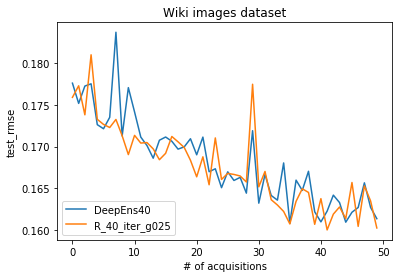

In [58]:
cs.plot_data_vs_ack_iter(
    50,
    filenames,
    'avg_seeds',
    'test_rmse',
    #test_log_prob_fn,
    test_fn("", "rmse"),
    50,
    arrs,
    to_eval,
    legend_loc=3,
    num_samples_label=False,
    title='Wiki images dataset',
)

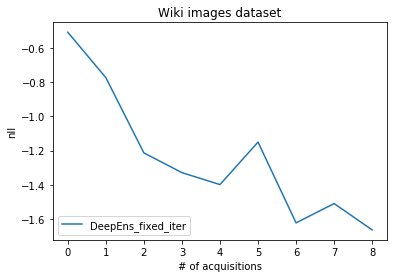

In [391]:
cs.plot_data_vs_ack_iter(
    50,
    filenames,
    'avg_seeds',
    'nll',
    train_fn("", "log_prob"),
    9,
    arrs,
    to_eval,
    legend_loc=3,
    num_samples_label=False,
    title='Wiki images dataset',
)

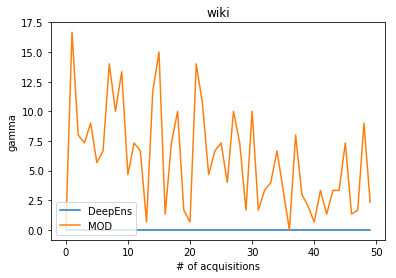

In [521]:
cs.plot_data_vs_ack_iter(
    50,
    filenames,
    'avg_seeds',
    'gamma',
    lambda x, filename: x['best_gamma'],
    50,
    arrs,
    to_eval,
    legend_loc=3,
)

/cluster/sj1/bb_opt/scripts/collect_stats.py:173: RuntimeWarning: Mean of empty slice.
  points[exp] = np.array(points[exp]).mean(axis=0)
/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: object of type 'numpy.float64' has no len()

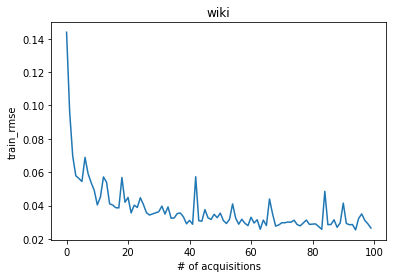

In [450]:
cs.plot_data_vs_ack_iter(
    50,
    filenames,
    'avg_seeds',
    'train_rmse',
    lambda x, filename : x['logging'][1]['train']['rmse'],
    100,
    arrs,
    to_eval,
    legend_loc=3,
)

In [ ]:
cs.plot_data_vs_ack_iter(
    200,
    filenames,
    'avg_seeds',
    'rmse',
    test_rmse_fn,
    20,
    arrs,
    to_eval,
    legend_loc=3,
)